In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("data/labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.shape

(24783, 7)

In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df = df.rename(columns={"hate_speech": 'hate', "offensive_language": 'offensive'})
df.head()

,count,hate,offensive,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<AxesSubplot:xlabel='class', ylabel='count'>

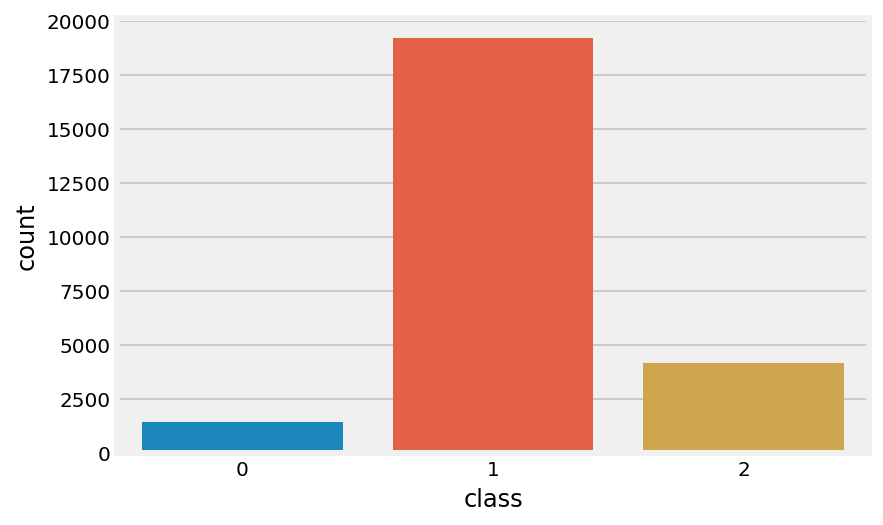

In [8]:
import seaborn as sns
sns.countplot(x='class', data=df)

In [9]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [10]:
df.tweet.head(30)

0     !!! RT @mayasolovely: As a woman you shouldn't...
1     !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2     !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3     !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4     !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5     !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
6     !!!!!!"@__BrighterDays: I can not just sit up ...
7     !!!!&#8220;@selfiequeenbri: cause I'm tired of...
8     " &amp; you might not get ya bitch back &amp; ...
9     " @rhythmixx_ :hobbies include: fighting Maria...
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

In [11]:
def num_of_words(df, col):
    df['word_ct'] = df[col].apply(lambda x: len(str(x).split(" ")))
    print(df[[col, 'word_ct']])

num_of_words(df, 'tweet')

                                                   tweet  word_ct
0      !!! RT @mayasolovely: As a woman you shouldn't...       25
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       16
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...       21
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        9
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...       26
...                                                  ...      ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...       19
24779  you've gone and broke the wrong heart baby, an...       13
24780  young buck wanna eat!!.. dat nigguh like I ain...       13
24781              youu got wild bitches tellin you lies        7
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...       18

[24783 rows x 2 columns]


In [12]:
df.word_ct.value_counts().sort_values(ascending=False)

9     1398
10    1391
7     1358
11    1340
8     1335
12    1270
13    1232
6     1095
14    1091
16    1063
15    1033
18    1023
5      957
17     925
19     856
21     839
20     835
22     810
23     778
4      725
24     668
25     617
26     512
3      455
27     396
28     247
2      210
29     169
30      81
31      43
32      17
1        8
33       5
36       1
Name: word_ct, dtype: int64

In [13]:
def num_of_chars(df, col):
    df['char_ct'] = df[col].str.len()
    print(df[[col, 'char_ct']])

num_of_chars(df, 'tweet')

                                                   tweet  char_ct
0      !!! RT @mayasolovely: As a woman you shouldn't...      140
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       85
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      120
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...       62
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      137
...                                                  ...      ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      146
24779  you've gone and broke the wrong heart baby, an...       70
24780  young buck wanna eat!!.. dat nigguh like I ain...       67
24781              youu got wild bitches tellin you lies       37
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      127

[24783 rows x 2 columns]


In [14]:
df.char_ct.value_counts().sort_values(ascending=False)

146    794
140    423
139    277
64     246
58     245
      ... 
392      1
280      1
248      1
255      1
447      1
Name: char_ct, Length: 250, dtype: int64

In [15]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

def avg_word_length(df, col):
    df['avg_wrd'] = df[col].apply(lambda x: avg_word(x))
    print(df[[col, 'avg_wrd']].head())

avg_word_length(df, 'tweet')

                                               tweet   avg_wrd
0  !!! RT @mayasolovely: As a woman you shouldn't...  4.640000
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  4.375000
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  4.761905
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  6.000000
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  4.307692


In [16]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [17]:
def stop_words(df, col):
    df['stopwords'] = df[col].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[[col, 'stopwords']].head())

stop_words(df, 'tweet')

                                               tweet  stopwords
0  !!! RT @mayasolovely: As a woman you shouldn't...         11
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...          3
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          6
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...          2
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         12


In [18]:
def hash_tags(df, col):
    df['hashtags'] = df[col].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    print(df[[col, 'hashtags']].head())

hash_tags(df, 'tweet')

                                               tweet  hashtags
0  !!! RT @mayasolovely: As a woman you shouldn't...         0
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         0
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         0
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...         0
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         0


In [19]:
df.hashtags.value_counts()

0     22719
1      1422
2       384
3        99
4        82
5        31
6        16
7        14
8         8
9         4
11        3
10        1
Name: hashtags, dtype: int64

In [20]:
def num_numerics(df, col):
    df['numerics'] = df[col].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    print(df[[col, 'numerics']].head())

num_numerics(df, 'tweet')

                                               tweet  numerics
0  !!! RT @mayasolovely: As a woman you shouldn't...         0
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         0
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         0
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...         0
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         0


In [21]:
df.numerics.value_counts()

0    23634
1      961
2      159
3       20
4        7
5        2
Name: numerics, dtype: int64

In [22]:
def num_callouts(df, col):
    df['callouts'] = df[col].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
    print(df[[col, 'callouts']].head())

num_callouts(df, 'tweet')

                                               tweet  callouts
0  !!! RT @mayasolovely: As a woman you shouldn't...         1
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         1
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         2
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...         2
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         1


In [23]:
df.callouts.value_counts()

0     11680
1     10355
2      1982
3       537
4       135
5        42
6        37
7         8
8         3
9         3
10        1
Name: callouts, dtype: int64

In [24]:
df2 = df.copy()
df2.head()

,count,hate,offensive,neither,class,tweet,word_ct,char_ct,avg_wrd,stopwords,hashtags,numerics,callouts
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,140,4.640000,11,0,0,1
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,85,4.375000,3,0,0,1
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,120,4.761905,6,0,0,2
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,62,6.000000,2,0,0,2
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,137,4.307692,12,0,0,1


In [25]:
tw = df.tweet
tw.head()

0    !!! RT @mayasolovely: As a woman you shouldn't...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3    !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4    !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
Name: tweet, dtype: object

In [26]:
import re

df2['callouts'] = df2.tweet.apply(lambda x: re.findall(r'@[\S]+', str(x)))
df2['callouts'].head()

0                    [@mayasolovely:]
1                         [@mleew17:]
2    [@UrKindOfBrand, @80sbaby4life:]
3       [@C_G_Anderson:, @viva_based]
4                  [@ShenikaRoberts:]
Name: callouts, dtype: object

In [27]:
df2.callouts = df2.callouts.apply(lambda x: str(x)[1:-1])
df2.callouts.head()

0                      '@mayasolovely:'
1                           '@mleew17:'
2    '@UrKindOfBrand', '@80sbaby4life:'
3       '@C_G_Anderson:', '@viva_based'
4                    '@ShenikaRoberts:'
Name: callouts, dtype: object

In [28]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'@[\S]+', '', str(x)))
df2.tweet.head(30)

0     !!! RT  As a woman you shouldn't complain abou...
1     !!!!! RT  boy dats cold...tyga dwn bad for cuf...
2     !!!!!!! RT  Dawg!!!! RT  You ever fuck a bitch...
3                 !!!!!!!!! RT   she look like a tranny
4     !!!!!!!!!!!!! RT  The shit you hear about me m...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!!&#8220; cause I'm tired of you big bitches...
8     " &amp; you might not get ya bitch back &amp; ...
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

In [29]:
df2['emojis'] = df2.tweet.apply(lambda x: re.findall(r'&[\S]+?;', str(x)))
df2.emojis.head()

0       [&amp;]
1            []
2            []
3            []
4    [&#57361;]
Name: emojis, dtype: object

In [30]:
df2.emojis = df2.emojis.apply(lambda x: str(x)[1:-1])
df2.emojis.head()

0       '&amp;'
1              
2              
3              
4    '&#57361;'
Name: emojis, dtype: object

In [31]:
df2.emojis.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               18164
'&#8230;'                                                                                                                                          

In [32]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'&[\S]+?;', '', str(x)))
df2.tweet.head(30)

0     !!! RT  As a woman you shouldn't complain abou...
1     !!!!! RT  boy dats cold...tyga dwn bad for cuf...
2     !!!!!!! RT  Dawg!!!! RT  You ever fuck a bitch...
3                 !!!!!!!!! RT   she look like a tranny
4     !!!!!!!!!!!!! RT  The shit you hear about me m...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!! cause I'm tired of you big bitches coming...
8      "  you might not get ya bitch back  thats that "
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

In [33]:
df2['hash'] = df2.tweet.apply(lambda x: re.findall(r'(#\w*,)|(#\w*$)|(#[\S]+)', str(x)))
df2.hash = df2.hash.apply(lambda x: str(x)[1:-1])
df2.hash.value_counts()

                                                                      22688
('', '', '#Yankees')                                                     27
('', '#Yankees', '')                                                     12
('', '', '#tbt')                                                         10
('', '#300', '')                                                          8
                                                                      ...  
('', '', "#China's"), ('', '', '#football')                               1
('', '', '#TDTHoe'), ('', '', '#teamspade'), ('', '#highgang', '')        1
('', '', '#TheOscars2014')                                                1
('', '', '#twitterafterdark')                                             1
('', '', '#TheyAintKnow?!')                                               1
Name: hash, Length: 1832, dtype: int64

In [34]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'(#\w*,)|(#\w*$)|(#[\S]+)', '', str(x)))

In [35]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'(\bRT\b|\bQT\b)', '', str(x)))
df2.tweet.head(30)

0     !!!   As a woman you shouldn't complain about ...
1     !!!!!   boy dats cold...tyga dwn bad for cuffi...
2     !!!!!!!   Dawg!!!!   You ever fuck a bitch and...
3                   !!!!!!!!!    she look like a tranny
4     !!!!!!!!!!!!!   The shit you hear about me mig...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!! cause I'm tired of you big bitches coming...
8      "  you might not get ya bitch back  thats that "
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

In [36]:
df2['urls'] = df2.tweet.apply(lambda x: re.findall(r'http[\S]+', str(x)))
df2.urls = df2.urls.apply(lambda x: str(x)[1:-1])
df2.urls.value_counts()

                            21771
'http://'                      18
'http://t.co/'                 14
'http://t'                     13
'http:'                        13
                            ...  
'http://t.co/S1JAGSJW6P'        1
'http://t.co/6uOWecbUQO'        1
'http://t.co/fMjlVMEqDO'        1
'http://t.co/yRVQjxeyqO'        1
'http://t.co/Ju84cIxp7Z'        1
Name: urls, Length: 2908, dtype: int64

In [37]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'http[\S]+', '', str(x)))
df2.tweet.head(30)

0     !!!   As a woman you shouldn't complain about ...
1     !!!!!   boy dats cold...tyga dwn bad for cuffi...
2     !!!!!!!   Dawg!!!!   You ever fuck a bitch and...
3                   !!!!!!!!!    she look like a tranny
4     !!!!!!!!!!!!!   The shit you hear about me mig...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!! cause I'm tired of you big bitches coming...
8      "  you might not get ya bitch back  thats that "
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

In [38]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'[^\w\s]', r'', str(x)))
df2.tweet.head(30)

0        As a woman you shouldnt complain about clea...
1        boy dats coldtyga dwn bad for cuffin dat ho...
2        Dawg   You ever fuck a bitch and she start ...
3                                she look like a tranny
4        The shit you hear about me might be true or...
5      The shit just blows meclaim you so faithful a...
6      I can not just sit up and HATE on another bit...
7      cause Im tired of you big bitches coming for ...
8          you might not get ya bitch back  thats that 
9              hobbies include fighting Mariam\n\nbitch
10     Keeks is a bitch she curves everyone  lol I w...
11                      Murda Gang bitch its Gang Land 
12        So hoes that smoke are losers   yea  go on IG
13           bad bitches is the only thing that i like 
14                                 bitch get up off me 
15                         bitch nigga miss me with it 
16                                  bitch plz whatever 
17                               bitch who do yo

In [39]:
# lower casing
df2.tweet = df2.tweet.apply(lambda x: " ".join(x.lower() for x in x.split()))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

In [40]:
# remove numbers or words with digits  
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'\w*\d\w*', r'', str(x)))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

In [41]:
# remove any double or more whitespaces to single whitespaces
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'\s\s+', ' ', str(x)))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

In [42]:
# remove any leading and trailing whitespace
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'(\A\s+|\s+\Z)', '', str(x)))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

# Preprocessing

In [75]:
df3 = df.copy()

In [76]:
df3.head()

,count,hate,offensive,neither,class,tweet,word_ct,char_ct,avg_wrd,stopwords,hashtags,numerics,callouts
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,140,4.640000,11,0,0,1
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,85,4.375000,3,0,0,1
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,120,4.761905,6,0,0,2
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,62,6.000000,2,0,0,2
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,137,4.307692,12,0,0,1


In [77]:
df3['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [78]:
df3['class'] = df3['class'].replace([2], 1)
df3['class'].value_counts()

1    23353
0     1430
Name: class, dtype: int64

In [79]:
df3['class'] = df3['class'].replace([0, 1], [1, 0])
df3['class'].value_counts()

0    23353
1     1430
Name: class, dtype: int64

In [80]:
df3 = df3.rename(columns={"class": "target"})

In [81]:
X = df3.tweet
y = df3.target

In [82]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_val, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

In [83]:
train = pd.DataFrame(X_tr, columns=['tweet'])
train.reset_index(inplace=True)
train = train.drop(columns=['index'], axis=1)
train.head()

,tweet
0,RT @FunSizedYogi: @TheBlackVoice well how else...
1,Funny thing is....it's not just the people doi...
2,"RT @winkSOSA: ""@AintShitSweet__: ""@Rakwon_OGOD..."
3,@Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...
4,S/o that real bitch


In [84]:
test = pd.DataFrame(X_val, columns=['tweet'])
test.reset_index(inplace=True)
test = test.drop(columns=['index'], axis=1)
test.head()

,tweet
0,934 8616\ni got a missed call from yo bitch
1,RT @KINGTUNCHI_: Fucking with a bad bitch you ...
2,RT @eanahS__: @1inkkofrosess lol my credit ain...
3,RT @Maxin_Betha Wipe the cum out of them faggo...
4,Niggas cheat on they bitch and don't expect no...


In [85]:
def preprocess_tweet(df, col):
    # callouts
    df[col] = df[col].apply(lambda x: re.sub(r'@[\S]+', ' ', str(x)))
    # character references
    df[col] = df[col].apply(lambda x: re.sub(r'&[\S]+?;', ' ', str(x)))
    # hashtags
    df[col] = df[col].apply(lambda x: re.sub(r'(#\w*,)|(#\w*$)|(#[\S]+)', '', str(x)))
    # twitter codes RT and QT
    df[col] = df[col].apply(lambda x: re.sub(r'(\bRT\b|\bQT\b)', ' ', str(x)))
    # URL links
    df[col] = df[col].apply(lambda x: re.sub(r'http[\S]+', ' ', str(x)))
    # punctuation
    df[col] = df[col].apply(lambda x: re.sub(r'[^\w\s]', r'', str(x)))
    # lower casing
    df[col] = df[col].apply(lambda x: " ".join(x.lower() for x in x.split()))
    # remove numbers or words with digits  
    df[col] = df[col].apply(lambda x: re.sub(r'\w*\d\w*', r' ', str(x)))
    # remove any double or more whitespaces to single whitespaces
    df[col] = df[col].apply(lambda x: re.sub(r'\s\s+', ' ', str(x)))

In [86]:
preprocess_tweet(train, 'tweet')
preprocess_tweet(test, 'tweet')

In [87]:
from textblob import TextBlob
def tokens(df):
    return TextBlob(train['tweet'][1]).words

In [88]:
tokens(train)

WordList(['funny', 'thing', 'isits', 'not', 'just', 'the', 'people', 'doing', 'it', 'its', 'the', 'people', 'who', 'seeing', 'these', 'pics', 'and', 'judging', 'the', 'birds', 'just', 'as', 'wrong'])

In [89]:
tokens(test)

WordList(['funny', 'thing', 'isits', 'not', 'just', 'the', 'people', 'doing', 'it', 'its', 'the', 'people', 'who', 'seeing', 'these', 'pics', 'and', 'judging', 'the', 'birds', 'just', 'as', 'wrong'])

In [90]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
def stemming(df):
    return df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [92]:
stemming(train)

0    well how els will white ppl get us to forget o...
1    funni thing isit not just the peopl do it it t...
2                      nigga mess with the wrong bitch
3                                   bitch ass nigggaaa
4                                   so that real bitch
Name: tweet, dtype: object

In [93]:
stemming(test)

0                      i got a miss call from yo bitch
1    fuck with a bad bitch you gone need some money...
2    lol my credit aint no where near good but i kn...
3    wipe the cum out of them faggot contact len is...
4    nigga cheat on they bitch and dont expect no p...
Name: tweet, dtype: object

In [98]:
from textblob import Word
def lemmatization(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print(df['tweet'].head())

In [99]:
lemmatization(train)

0    well how else will white ppl get u to forget o...
1    funny thing isits not just the people doing it...
2                    nigga messed with the wrong bitch
3                                    bitch as nigggaaa
4                                   so that real bitch
Name: tweet, dtype: object


In [100]:
lemmatization(test)

0                    i got a missed call from yo bitch
1    fucking with a bad bitch you gone need some mo...
2    lol my credit aint no where near good but i kn...
3    wipe the cum out of them faggot contact lens i...
4    nigga cheat on they bitch and dont expect no p...
Name: tweet, dtype: object


In [102]:
from textblob import TextBlob
def combination_of_words(df):
    return (TextBlob(df['tweet'][0]).ngrams(2))

combination_of_words(train)

[WordList(['well', 'how']),
 WordList(['how', 'else']),
 WordList(['else', 'will']),
 WordList(['will', 'white']),
 WordList(['white', 'ppl']),
 WordList(['ppl', 'get']),
 WordList(['get', 'u']),
 WordList(['u', 'to']),
 WordList(['to', 'forget']),
 WordList(['forget', 'our']),
 WordList(['our', 'horrific']),
 WordList(['horrific', 'past']),
 WordList(['past', 'other']),
 WordList(['other', 'than']),
 WordList(['than', 'to']),
 WordList(['to', 'paint']),
 WordList(['paint', 'a']),
 WordList(['a', 'pretty']),
 WordList(['pretty', 'picture']),
 WordList(['picture', 'of']),
 WordList(['of', 'ho'])]

In [103]:
combination_of_words(test)

[WordList(['i', 'got']),
 WordList(['got', 'a']),
 WordList(['a', 'missed']),
 WordList(['missed', 'call']),
 WordList(['call', 'from']),
 WordList(['from', 'yo']),
 WordList(['yo', 'bitch'])]

In [ ]:
def term_frequency(df):
    tf1 = (df['tweet'][1:2].apply(lambda x: pd.value_counts()))

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [56]:
data_tr = train.tweet.to_list()
data_val = test.tweet.to_list()

In [57]:
tf_tr = tf.fit_transform(data_tr)
tf_val = tf.transform(data_val)

## Newsgroup Dataset

In [201]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'comp.windows.x', 'rec.sport.hockey', 'sci.crypt', 'talk.politics.guns']
newsgroup_tr = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

In [203]:
data = newsgroup_tr.data
target = newsgroup_tr.target
type(data)

list

In [204]:
target

array([4, 3, 1, ..., 3, 4, 3])

In [205]:
type(target)

numpy.ndarray

In [206]:
label_names = newsgroup_tr.target_names

In [208]:
from nltk.corpus import stopwords
import string
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

In [209]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed

In [210]:
processed_data = list(map(process_article, data))

In [211]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

46990

In [216]:
import nltk
from nltk import FreqDist
articles_concat = []
for article in processed_data:
    articles_concat += article

articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(20)

[('--', 29501),
 ('x', 4840),
 ("'s", 3203),
 ("n't", 2933),
 ('1', 2529),
 ('would', 1985),
 ('0', 1975),
 ('one', 1758),
 ('2', 1664),
 ('people', 1243),
 ('use', 1146),
 ('get', 1068),
 ('like', 1036),
 ('file', 1024),
 ('3', 1005),
 ('also', 875),
 ('key', 869),
 ('4', 864),
 ('could', 853),
 ('know', 814)]

In [218]:
data[0]


'Note: These trial updates are summarized from reports in the\n_Idaho Statesman_ and the local NBC affiliate television\nstation, KTVB Channel 7.\n\nRandy Weaver/Kevin Harris trial update: Day 4.\n\nFriday, April 16, 1993 was the fourth day of the trial.\n\nSynopsis: Defense attorney Gerry Spence cross-examined agent\nCooper under repeated objections from prosecutor Ronald\nHowen.  Spence moved for a mistrial but was denied.\n\nThe day was marked by a caustic cross-examination of Deputy\nMarshal Larry Cooper by defense attorney Gerry Spence.  Although\nSpence has not explicitly stated so, one angle of his stategy\nmust involve destroying the credibility of agent Cooper.  Cooper is\nthe government\'s only eyewitness to the death of agent Degan.\nSpence attacked Cooper\'s credibility by pointing out discrepancies\nbetween Cooper\'s statements last September and those made in court.\nCooper conceded that, "You have all these things compressed into\na few seconds...It\'s difficult to remem

In [219]:
data[1]

''